In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import mutual_info_classif as MIC

In [3]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female
m_df = load_male_long_df(average_weeks=True, merge_size=False, merge_ages=True, df_path=DF_PATHS.usage_male).groupby(['age','mouse']).mean()
f_df = load_female_long_df(average_weeks=True, merge_size=False, filter_female=True, merge_ages=True, df_path=DF_PATHS.usage_female).groupby(['age','mouse']).mean()
m_df['sex'] = 'm'
m_df.set_index('sex', inplace=True, append=True)
f_df['sex'] = 'f'
f_df.set_index('sex', inplace=True, append=True)

# Combine male and female data into a single DataFrame
combined_df = pd.concat([m_df, f_df])

In [5]:
long_data = combined_df.copy()
X = long_data.to_numpy()
y = list(long_data.index.get_level_values('mouse'))
mi_score_id = MIC(X,y)

In [6]:
n=10
id_indx = np.argsort(mi_score_id)[::-1][0:n] # syllble index
impsyl_id= list(long_data.columns[id_indx]) #syllable id
top_mi_score_id = mi_score_id[id_indx]
imp_id = np.array(['n']*len(mi_score_id))
imp_id[np.array(id_indx)]='y'

In [7]:
print('10 most informative syllables for identity: ',impsyl_id)

10 most informative syllables for identity:  [84, 83, 79, 97, 41, 24, 60, 85, 95, 23]


In [8]:
data=long_data[impsyl_id]

In [9]:
f_data=data.query('sex=="f"')
m_data=data.query('sex=="m"')

In [10]:
format_plots()

In [11]:
#met = 'jensenshannon'
met= 'cosine'

In [12]:
iid = dict()
iid_df = []
iid_avg_df = []
for age, _df in f_data.groupby('age'):
    inter_ind_dists = pdist(_df, metric=met)
    iid[age] = inter_ind_dists
    #iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
    d = squareform(inter_ind_dists)
    d[np.diag_indices_from(d)] = np.nan
    d = np.nanmean(d, axis=1)
    iid_avg_df.append(pd.DataFrame(dict(iid=d, age=age, mouse=_df.index.get_level_values('mouse'))))
iid_df = pd.concat(iid_df)
iid_avg_df_f = pd.concat(iid_avg_df)

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


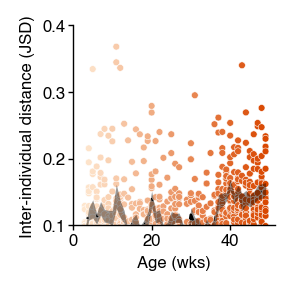

In [13]:
fig, ax = plt.subplots(figsize=(1.3, 1.3))
a = sns.scatterplot(
    data=iid_avg_df_f,
    x="age",
    y="iid",
    palette=cmf,
    hue="age",
    legend=False,
    s=6,
    linewidths=0,
    alpha=1,
    zorder=1,
)
a = sns.lineplot(
    data=iid_avg_df_f,
    x="age",
    y="iid",
    zorder=-1,
    color='black',
    err_kws={"lw": 0, "alpha": 0.4},
    errorbar=("se"),
)
a.set(
    ylim=(0.1, 0.4),
    xlim=(0, None),
    xlabel="Age (wks)",
    ylabel="Inter-individual distance (JSD)",
    #xticks=[0,10,20,30,40,50],
)
sns.despine()

In [14]:
c = PlotConfig()
#fig.savefig(c.dana_save_path / "fig3"/ 'inter_indv_distance_longv2_female_JSD.pdf')

In [15]:
iid = dict()
iid_df = []
iid_avg_df = []
for age, _df in m_data.groupby('age'):
    inter_ind_dists = pdist(_df, metric=met)
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
    d = squareform(inter_ind_dists)
    d[np.diag_indices_from(d)] = np.nan
    d = np.nanmean(d, axis=1)
    iid_avg_df.append(pd.DataFrame(dict(iid=d, age=age, mouse=_df.index.get_level_values('mouse'))))
iid_df = pd.concat(iid_df)
iid_avg_df_m = pd.concat(iid_avg_df)

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


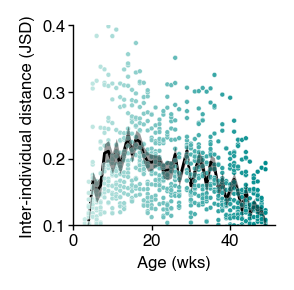

In [16]:
fig, ax = plt.subplots(figsize=(1.3, 1.3))

a = sns.scatterplot(
    data=iid_avg_df_m,
    x="age",
    y="iid",
    palette=cmm,
    hue="age",
    legend=False,
    s=3,
    linewidths=0,
    alpha=1,
    zorder=1,
)
a = sns.lineplot(
    data=iid_avg_df_m,
    x="age",
    y="iid",
    zorder=-1,
    color='black',
    err_kws={"lw": 0, "alpha": 0.4},
    errorbar=("se"),
)
a.set(
    ylim=(0.1, 0.4),
    xlim=(0, None),
    xlabel="Age (wks)",
    ylabel="Inter-individual distance (JSD)",
    #xticks=[0,10,20,30,40,50],
)
sns.despine()

In [17]:
c = PlotConfig()
#fig.savefig(c.dana_save_path / "fig3"/ 'inter_indv_distance_longv2_male_JSD.pdf')

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

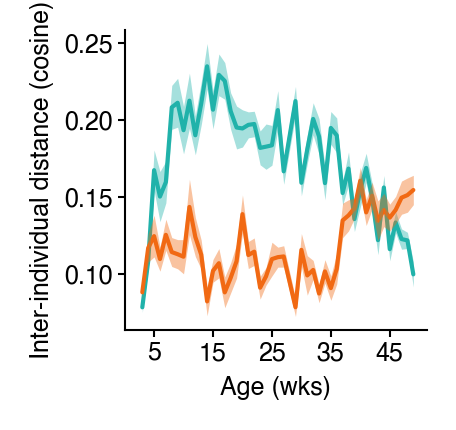

In [18]:
fig = figure(1.3, 1.3)
ax = fig.gca()
'''
a = sns.scatterplot(
    data=iid_avg_df_m,
    x="age",
    y="iid",
    palette=cmm,
    hue="age",
    legend=False,
    s=3,
    linewidths=0,
    alpha=1,
    zorder=1,
)
a = sns.scatterplot(
    data=iid_avg_df_f,
    x="age",
    y="iid",
    palette=cmf,
    hue="age",
    legend=False,
    s=3,
    linewidths=0,
    alpha=1,
    zorder=1,
)
'''
a = sns.lineplot(
    data=iid_avg_df_m,
    x="age",
    y="iid",
    zorder=-1,
    color='#20B2AA',
    err_kws={"lw": 0, "alpha": 0.4},
    errorbar=("se"),
)


a = sns.lineplot(
    data=iid_avg_df_f,
    x="age",
    y="iid",
    zorder=-1,
    color='#f16913',
    err_kws={"lw": 0, "alpha": 0.4},
    errorbar=("se"),
)
a.set(
    #ylim=(0, 0.3),
    xlim=(0, None),
    xlabel="Age (wks)",
    ylabel="Inter-individual distance (cosine)",
    xticks=[5,15,25,35,45],
)

sns.despine()

In [19]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig3"/ 'inter_indv_distance_longv2_fvm_MI_cosine.pdf')

In [20]:
## stats

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import pinv_extended  
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tabulate import tabulate

In [22]:
def fit_2mixed_linear_models(data, dependent_var, factor1,factor2, group):
    
    align_data = data.copy()
    align_data['ranked_response'] = align_data[[dependent_var]]

    #formula = f'ranked_response ~ {factor1}*{group}'
    formula = f'ranked_response ~ {factor1}*C({factor2})'
        
    # Fit the mixed linear model
    model = smf.mixedlm(formula, align_data, groups=f'{group}')
    result = model.fit()
    return result

def extract_summary_to_dataframe(results, num_tests):
    summary_data = []

    for var, result in results.items():
        summary = result.summary()
        coefs = result.params
        pvalues = result.pvalues
        conf_int = result.conf_int()
        
        for param in coefs.index:
            pvalue_corrected = min(pvalues[param] * num_tests, 1.0)  # Apply Bonferroni correction
            
            summary_data.append({
                'Dependent Variable': var,
                'Parameter': param,
                'Coefficient': coefs[param],
                'P-value': pvalues[param],
                'Corrected P-value': pvalue_corrected,
                'CI Lower': conf_int[0][param],
                'CI Upper': conf_int[1][param]
            })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [23]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female
m_df = load_male_long_df(average_weeks=True, merge_size=False, merge_ages=True, df_path=DF_PATHS.usage_male).groupby(['age','mouse']).mean()
f_df = load_female_long_df(average_weeks=True, merge_size=False, filter_female=True, merge_ages=True, df_path=DF_PATHS.usage_female).groupby(['age','mouse']).mean()
m_df['sex'] = 'm'
m_df.set_index('sex', inplace=True, append=True)
f_df['sex'] = 'f'
f_df.set_index('sex', inplace=True, append=True)

In [24]:
iid = dict()
iid_df = []
iid_avg_df = []
for age, _df in f_data.groupby('age'):
    inter_ind_dists = pdist(_df, metric=met)
    iid[age] = inter_ind_dists
    #iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
    d = squareform(inter_ind_dists)
    d[np.diag_indices_from(d)] = np.nan
    d = np.nanmean(d, axis=1)
    iid_avg_df.append(pd.DataFrame(dict(iid=d, age=age, mouse=_df.index.get_level_values('mouse'))))
iid_df = pd.concat(iid_df)
iid_avg_df_f = pd.concat(iid_avg_df)

In [25]:
iid = dict()
iid_df = []
iid_avg_df = []
for age, _df in m_data.groupby('age'):
    inter_ind_dists = pdist(_df, metric=met)
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
    d = squareform(inter_ind_dists)
    d[np.diag_indices_from(d)] = np.nan
    d = np.nanmean(d, axis=1)
    iid_avg_df.append(pd.DataFrame(dict(iid=d, age=age, mouse=_df.index.get_level_values('mouse'))))
iid_df = pd.concat(iid_df)
iid_avg_df_m = pd.concat(iid_avg_df)

In [26]:
iid_avg_df_f['sex']='f'
iid_avg_df_f.set_index(['age','mouse','sex'], inplace=True)

iid_avg_df_m['sex']='m'
iid_avg_df_m.set_index(['age','mouse','sex'], inplace=True)

combined_df = pd.concat([iid_avg_df_m,iid_avg_df_f])

In [27]:
data = combined_df.copy()
temp = data.copy()
temp.reset_index(inplace=True)

if 'level_0' in temp.columns:
    temp.drop(columns=['level_0'], inplace=True)

results={}
syll = data.columns
n=len(syll)
ss=[]
ps=[]
ints=[]
intp=[]

for i in syll:
    result=fit_2mixed_linear_models(temp, i, 'age','sex','mouse')
    results[i] = result

# Extract the summary to a DataFrame with Bonferroni correction
num_tests = len(data.columns)  # Number of tests is the number of dependent variables (excluding 'age' and 'mouse')
summary_df = extract_summary_to_dataframe(results, num_tests)

# Print the DataFrame nicely
print(summary_df)
summary_df.to_csv('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/stats/mxlm_fvm_longv2_inter-indv.csv', index=False)

  Dependent Variable        Parameter  Coefficient       P-value  \
0                iid        Intercept     0.097934  4.520618e-47   
1                iid      C(sex)[T.m]     0.102219  5.140375e-27   
2                iid              age     0.000766  2.681000e-11   
3                iid  age:C(sex)[T.m]    -0.001742  5.206404e-27   
4                iid        mouse Var     0.305123  7.453211e-05   

   Corrected P-value  CI Lower  CI Upper  
0       4.520618e-47  0.084613  0.111255  
1       5.140375e-27  0.083605  0.120833  
2       2.681000e-11  0.000540  0.000991  
3       5.206404e-27 -0.002059 -0.001424  
4       7.453211e-05  0.154156  0.456090  


/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
